In [1]:
import random

In [8]:
from swarmops.PSO import PSO
from swarmops.Problem import Problem

In [2]:
from c_interop import Library
from common import Item
from continuous import continuous_decode, continuous_score
from ortools_models import task_one_model, task_one_model_adapter, task_two_model
from skyline import skyline_decode
from plots import draw_pallet, draw_pallet_mass
from metrics import print_efficiency

In [3]:
from data_analys.data_generator import guillotine_cutting

In [4]:
items = [Item(random.randint(1, 5), random.randint(1, 5), random.randint(1, 5)) for _ in range(12)]
items

[Item(3, 3, 1),
 Item(5, 3, 2),
 Item(2, 2, 1),
 Item(4, 3, 2),
 Item(2, 2, 4),
 Item(5, 2, 3),
 Item(5, 4, 1),
 Item(5, 1, 1),
 Item(4, 4, 4),
 Item(3, 1, 2),
 Item(1, 1, 5),
 Item(4, 4, 2)]

In [4]:
H = 100
W = 100
items = [Item(item[2], item[3],random.randint(1,5)) for item in guillotine_cutting(W, H, 20)]
items

[Item(86, 7, 5),
 Item(6, 7, 4),
 Item(6, 4, 5),
 Item(6, 18, 2),
 Item(6, 32, 3),
 Item(6, 39, 3),
 Item(5, 16, 5),
 Item(5, 84, 4),
 Item(32, 4, 5),
 Item(20, 4, 4),
 Item(52, 4, 5),
 Item(52, 55, 1),
 Item(3, 63, 4),
 Item(34, 44, 2),
 Item(34, 19, 4),
 Item(3, 27, 4),
 Item(3, 5, 2),
 Item(3, 5, 3),
 Item(45, 30, 5),
 Item(41, 30, 3)]

In [12]:
exRes = task_one_model(W, H, items, limit=2 * 60 * 1000, backend='Gurobi')
exRes

(1,
 15.0,
 0.0,
 [Position(0.0, 0.0, False),
  Position(89.0, 0.0, False),
  Position(88.99999999999997, 96.0, False),
  Position(89.00000000000024, 7.0, False),
  Position(89.00000000000003, 25.000000000009795, False),
  Position(89.0, 57.00000000000452, False),
  Position(94.99999999999997, 0.0, False),
  Position(95.0, 15.999999999999929, False),
  Position(20.00000000000111, 92.00000000000024, False),
  Position(0.0, 92.00000000000679, False),
  Position(0.0, 96.0, False),
  Position(0.0, 36.999999999999986, False),
  Position(86.0, 36.99999999999987, False),
  Position(52.000000000000554, 55.99999999999875, False),
  Position(52.00000000000354, 36.9999999999999, False),
  Position(85.99999999999983, 9.999999999999885, False),
  Position(86.0, 2.0, False),
  None,
  Position(40.99999999999997, 7.0, False),
  Position(0.0, 6.999999999999972, False)])

In [5]:
exRes2 = task_two_model(W, H, items,20,20, limit=60 * 1000, backend='Gurobi')
exRes2

(1,
 2737.0,
 0.0,
 [Position(53.49999999999989, 14.0, True),
  None,
  Position(65.49999999999909, 47.58333333333305, True),
  None,
  Position(68.00000000000004, 2.9999999999999645, True),
  None,
  Position(60.49999999999909, 0.0, False),
  Position(60.499999999999886, 16.0, False),
  Position(65.49999999999909, 10.583333333333044, True),
  None,
  None,
  Position(1.4999999999998863, 0.0, False),
  None,
  Position(65.49999999999932, 56.0, False),
  None,
  Position(65.49999999999989, 0.0, True),
  Position(65.49999999999943, 42.583333333333044, False),
  Position(53.49999999999993, 0.0, True),
  Position(69.49999999999912, 9.0, True),
  None])

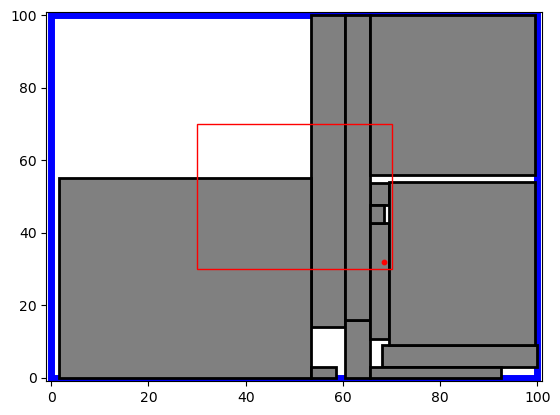

In [6]:
draw_pallet_mass(W, H, items, exRes2[3],20,20)[0]

In [6]:
skRes = skyline_decode(W, H, items, range(len(items)))
skRes

(4356,
 [Position(0, 0, False),
  Position(86, 0, False),
  Position(92, 0, False),
  Position(0, 7, False),
  Position(6, 7, False),
  Position(16, 7, False),
  Position(22, 7, False),
  Position(27, 7, False),
  Position(12, 7, True),
  Position(32, 7, False),
  Position(32, 11, True),
  None,
  Position(97, 4, False),
  None,
  Position(36, 38, True),
  Position(36, 11, False),
  Position(92, 4, True),
  Position(39, 11, False),
  Position(52, 7, False),
  Position(56, 37, False)])

In [17]:
order = list(range(len(items)))
order.sort(key=lambda i: items[i].height * items[i].width, reverse=True)
skRes2 = skyline_decode(W, H, items, order)
skRes2

(316,
 [Position(86, 0, True),
  Position(93, 0, True),
  Position(86, 86, False),
  None,
  Position(36, 60, False),
  Position(30, 55, False),
  Position(36, 55, True),
  Position(93, 6, False),
  None,
  None,
  Position(36, 93, False),
  Position(0, 0, False),
  Position(0, 97, True),
  Position(52, 0, False),
  Position(52, 44, False),
  Position(83, 63, False),
  Position(47, 60, True),
  Position(42, 60, True),
  Position(0, 55, True),
  Position(42, 63, False)])

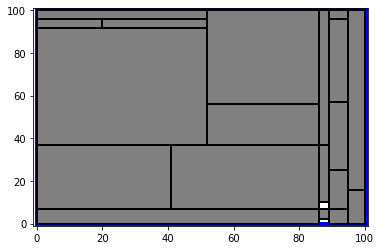

In [14]:
draw_pallet(W, H, items, exRes[3])

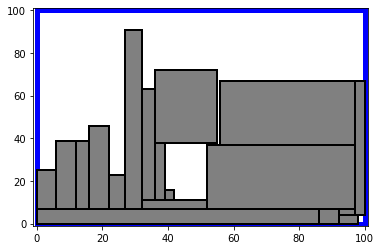

In [12]:
draw_pallet(W, H, items, skRes[1])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


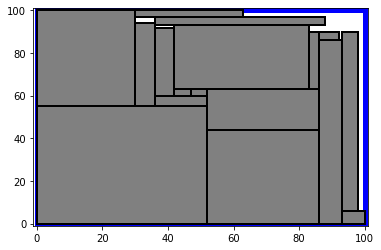

In [18]:
draw_pallet(W, H, items, skRes2[1])

In [9]:
print('Solver:')
print_efficiency(10, 10, items, task_one_model_adapter)
print('Skyline:')
skyline_decode_adapter = lambda w, h, its: skyline_decode(w, h, its, range(len(its)))
print_efficiency(10, 10, items, skyline_decode_adapter)

Solver:


KeyboardInterrupt: 

In [4]:
lib = Library('lib/libcpp.dll')
c_skyline = lib.get_function('simple_skyline')
annealing = lib.get_function('simulated_annealing_skyline_auto')

In [10]:
skRes3 = c_skyline(W, H, items)
skRes3

(1075,
 [Position(0.0, 0.0, False),
  Position(0.0, 7.0, False),
  Position(6.0, 7.0, False),
  Position(0.0, 14.0, False),
  Position(6.0, 14.0, False),
  Position(12.0, 39.0, False),
  Position(18.0, 39.0, False),
  Position(12.0, 34.0, True),
  Position(23.0, 39.0, False),
  Position(23.0, 43.0, False),
  Position(6.0, 46.0, True),
  Position(23.0, 47.0, True),
  Position(6.0, 11.0, True),
  None,
  Position(81.0, 53.0, True),
  Position(78.0, 47.0, False),
  Position(81.0, 47.0, False),
  Position(93.0, 48.0, False),
  None,
  None])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


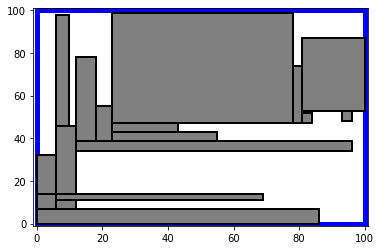

In [11]:
draw_pallet(W, H, items, skRes3[1])

In [5]:
annRes = annealing(W, H, items)
annRes

(0,
 [Position(14.0, 63.0, False),
  Position(8.0, 4.0, False),
  Position(60.0, 0.0, False),
  Position(8.0, 11.0, False),
  Position(8.0, 29.0, False),
  Position(8.0, 61.0, False),
  Position(3.0, 84.0, False),
  Position(3.0, 0.0, False),
  Position(28.0, 0.0, False),
  Position(8.0, 0.0, False),
  Position(14.0, 59.0, False),
  Position(14.0, 4.0, False),
  Position(0.0, 0.0, False),
  Position(66.0, 19.0, False),
  Position(66.0, 0.0, False),
  Position(0.0, 73.0, False),
  Position(0.0, 68.0, False),
  Position(0.0, 63.0, False),
  Position(14.0, 70.0, False),
  Position(59.0, 70.0, False)])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


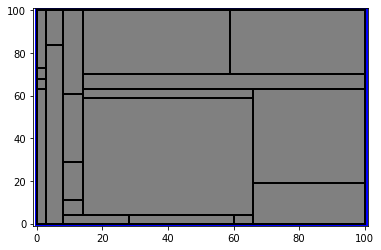

In [6]:
draw_pallet(W, H, items, annRes[1])

In [24]:
maxv = max(max(item.width, item.height) for item in items)
lb = [-2 * maxv] * (2 * len(items)) + [0] * len(items)
ub = [2 * maxv] * (2 * len(items)) + [1] * len(items)
glb = [-max(item.width, item.height) for item in items for _ in (0, 1)] + [0] * len(items)
gub = [W, H] * len(items) + [1] * len(items)
prob = Problem('', 3 * len(items), 0, lb, ub, glb, gub,
               func=lambda v, limit: continuous_score(W, H, items, 10, 0.01, 10, v))
res = PSO(parameters=PSO.parameters_30dim_600000eval, problem=prob, max_evaluations=20000)
conRes = continuous_decode(W, H, items, res.best)

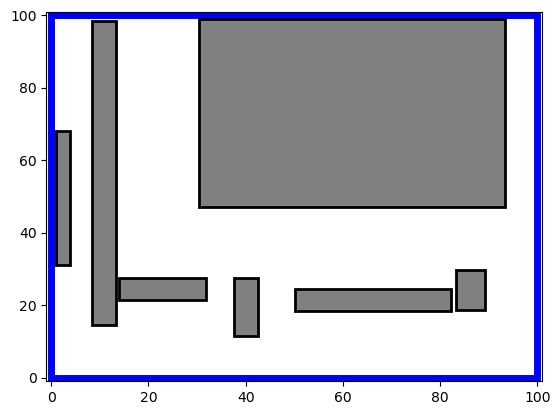

In [25]:
draw_pallet(W, H, items, conRes[1])